# Calculating Derivatives in PyTorch

https://machinelearningmastery.com/calculating-derivatives-in-pytorch/

https://discuss.pytorch.org/t/how-to-implement-lagrange-multiplier-with-pytorch/89011/10

## gradient-descent-with-momentum-from-scratch
https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/


>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


/tmp/ipykernel_203372/2890425506.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


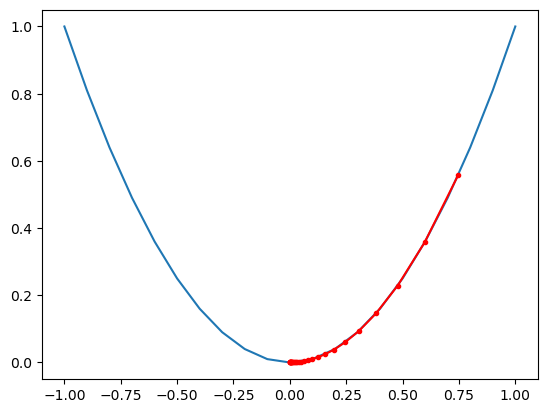

In [69]:
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

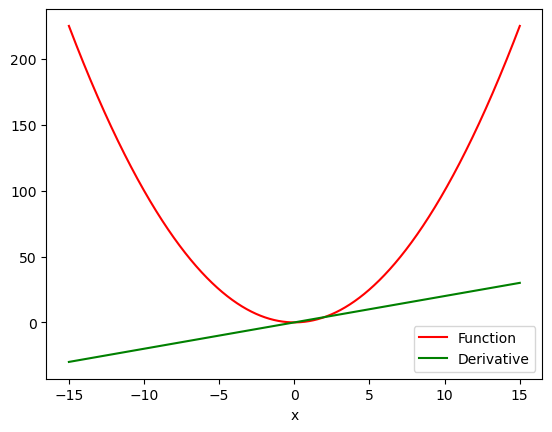

In [2]:
# compute the derivative of the function with multiple values
import torch
import matplotlib.pyplot as plt
x = torch.linspace(-15, 15, 10001, requires_grad = True)
Y = x ** 2
y = torch.sum(Y)
y.backward()

# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

# Calculus with PyTorch - scalarish

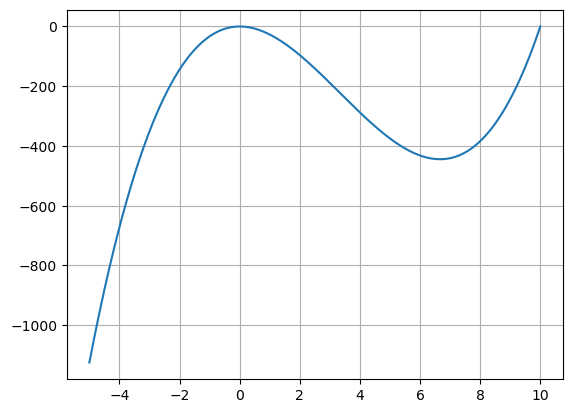

In [63]:
lfn = lambda x: 3*x**3 - 30*x**2

t = torch.linspace(-5, 10, 1001)
plt.plot(t, lfn(t))
plt.grid()

5.5316725492665405e-27

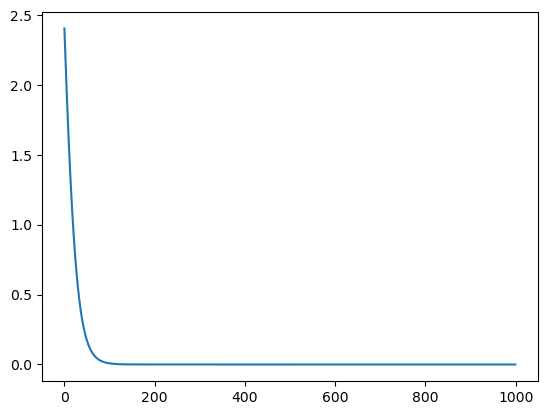

In [68]:
x = torch.tensor(2.5, requires_grad=True)

xs = []
ls = []
for i in range(1000):
    f = lfn(x)
    dx = torch.autograd.grad(f, [x])
    with torch.no_grad():
        x += 1e-3 * dx[0]
    xs.append(x.item())

%matplotlib inline
from matplotlib import pyplot
pyplot.plot(xs)
pyplot.plot(ls)
xs[-1]

-inf

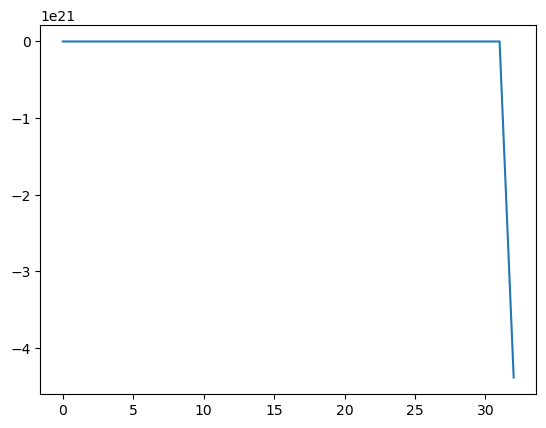

In [67]:
x = torch.tensor(-2.0, requires_grad=True)

xs = []
ls = []
for i in range(1000):
    f = lfn(x)
    dx = torch.autograd.grad(f, [x])
    with torch.no_grad():
        x -= 1e-3 * dx[0]
    xs.append(x.item())

%matplotlib inline
from matplotlib import pyplot
pyplot.plot(xs)
pyplot.plot(ls)
xs[-1]

#### dx[0]

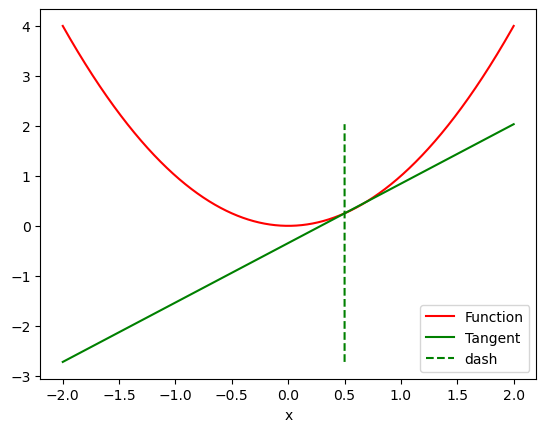

In [25]:
x = torch.linspace(-2, 2, 10001, requires_grad = True)
Y = x ** 2
y = torch.sum(Y)
y.backward()

xgrad = x.grad.detach().numpy()
y_ = Y.detach().numpy()
x_ = x.detach().numpy()
m = x_[np.where(np.abs(y_ - np.sqrt(2)) <.0001)[0]][1]
x0 = .5
z0 = x0 ** 2
z  = m * (x_ - x0) +z0

function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), z, label = 'Tangent')
derivative_line.set_color("green")
derivative_line, = plt.plot(x.detach().numpy()*0+.5, z, label = 'dash', linestyle='dashed')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

# Find x where y = x^2 crosses y= sqrt(2)

[-1.1892  1.1892]


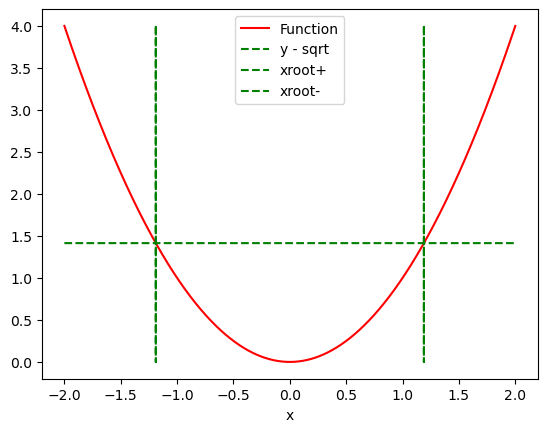

In [11]:
import numpy as np

xroot = x_[np.where(np.abs(y_ - np.sqrt(2)) <.0001)[0]]
print(xroot)

function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), Y.detach().numpy()*0+np.sqrt(2), label = 'y - sqrt', linestyle='dashed')
derivative_line.set_color("green")
derivative_line, = plt.plot(x.detach().numpy()*0 + xroot[1], Y.detach().numpy(), label = 'xroot+', linestyle='dashed')
derivative_line.set_color("green")
derivative_line, = plt.plot(x.detach().numpy()*0 + xroot[0], Y.detach().numpy(), label = 'xroot-', linestyle='dashed')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()


# lagrangian Example

Minimize x**2 / 2, where x = 1. To do so, we find the critical
point of x**2 / 2 + lambda * (x - 1). The critical point is
(1, -1), and at the critical point the Hessian matrix is
[[1, 1], [1, 0]]. (The second partial with respect to lambda
is indeed 0.)
\

(0.9999565482139587, -0.9999026656150818)

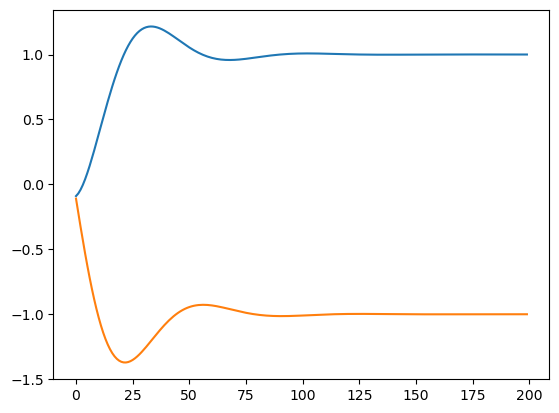

In [16]:
lfn = lambda x, l: x**2 / 2 + l * (x - 1)
x = torch.tensor(-0.1, requires_grad=True)
l = torch.tensor(0.0, requires_grad=True)

xs = []
ls = []
for i in range(200):
    f = lfn(x, l)
    dx, dl = torch.autograd.grad(f, [x, l])
    with torch.no_grad():
        x -= 1e-1 * dx
        l += 1e-1 * dl
    xs.append(x.item())
    ls.append(l.item())

%matplotlib inline
from matplotlib import pyplot
pyplot.plot(xs)
pyplot.plot(ls)
xs[-1], ls[-1]

In [17]:
dx

tensor(6.3956e-05)